In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [260]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT"      # RBC Folate
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI"                      # RBC Folate (FOLATE
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_HealthIndicator_RawData.csv", index=False)
# print("Final dataset saved as 'SES_RAW DATA/health indicators/NHANES_SES_HealthIndicator_RawData.csv'")

In [261]:
file = "NHANES_SES_HealthIndicator_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,HOD051,IND310,BMXBMI,BMXWAIST,BPXOSY1,BPXODI1,LBXTC,LBXGLU,LBXIN,LBXHSCRP,LBXGH,LBXFER,LBDRFOSI
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,98.0,264.0,113.0,15.53,1.78,5.6,38.0,698.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,84.0,214.0,99.0,19.91,2.03,5.6,38.0,933.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,79.0,187.0,156.0,16.33,5.62,6.2,13.3,830.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,72.0,178.0,100.0,9.63,1.45,5.5,38.0,1050.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,72.0,178.0,100.0,9.63,1.45,5.5,24.4,1050.0


In [262]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXIN', 'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI'],
      dtype='object')

In [263]:
df.shape

(11933, 18)

In [264]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Housing', # Housing
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'Glycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate' # RBC Folate
]

# df.head()

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 11933 non-null  float64
 1   Age                  11933 non-null  float64
 2   Gender               11933 non-null  float64
 3   Education            11933 non-null  float64
 4   FamilyIncomeRatio    11933 non-null  float64
 5   Housing              11933 non-null  float64
 6   TotalSavings         11933 non-null  float64
 7   BMI                  11933 non-null  float64
 8   WaistCircumference   11933 non-null  float64
 9   SystolicBP           11933 non-null  float64
 10  DiastolicBP          11933 non-null  float64
 11  TotalCholesterol     11933 non-null  float64
 12  FastingBloodGlucose  11933 non-null  float64
 13  InsulinLevel         11933 non-null  float64
 14  CRP                  11933 non-null  float64
 15  Glycohemoglobin      11933 non-null 

In [266]:
nan_values = df.isna().sum()
print(nan_values)

SEQN                   0
Age                    0
Gender                 0
Education              0
FamilyIncomeRatio      0
Housing                0
TotalSavings           0
BMI                    0
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
TotalCholesterol       0
FastingBloodGlucose    0
InsulinLevel           0
CRP                    0
Glycohemoglobin        0
Ferritin               0
RBCFolate              0
dtype: int64


In [267]:
# print the mode of the TotalSavings column
# print(df['TotalSavings'].mode())

In [268]:
print(df['Housing'].mean())

5.847816978127881


In [269]:
print(df['Education'].mean())

3.872622140283248


In [270]:
# df['TotalSavings'] = df['TotalSavings'].replace({77: 1, 99: 1, '.': 1})
# df['TotalSavings'].fillna(df['TotalSavings'].mode(), inplace=True)

df['Housing'] = df['Housing'].replace({77: 5, 99: 5, '.': 5})

df['Education'] = df['Education'].replace({7: 3.872622140283248, 9: 3.872622140283248, '.': 3.872622140283248})

In [271]:
# df['TotalSavings'].unique()

In [272]:
df.drop(columns=['SEQN', 'Age', 'Gender', 'TotalSavings'], inplace=True)

In [273]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [274]:
df_scaled.head()

,Education,FamilyIncomeRatio,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,CRP,Glycohemoglobin,Ferritin,RBCFolate
0,1.225292,1.528649,2.293511,-0.000150,0.328295,1.120929,2.702145,2.607340,0.575387,0.306911,-0.154200,-0.022398,-0.111845,-1.010082
1,1.225292,1.528649,1.778446,0.946435,1.226010,0.173190,1.220287,1.054528,-0.186442,0.612141,-0.110253,-0.022398,-0.111845,-0.453051
2,-0.939335,-0.829251,0.233253,0.393047,0.065550,-0.503766,0.691052,0.216009,2.915292,0.362661,0.520834,0.729419,-1.066215,-0.697196
3,0.142978,-0.750435,-0.796876,-0.466161,-1.198914,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,-0.212211,-0.147700,-0.111845,-0.175721
4,0.142978,0.609134,1.263382,-0.087527,0.021759,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,-0.212211,-0.147700,-0.637328,-0.175721


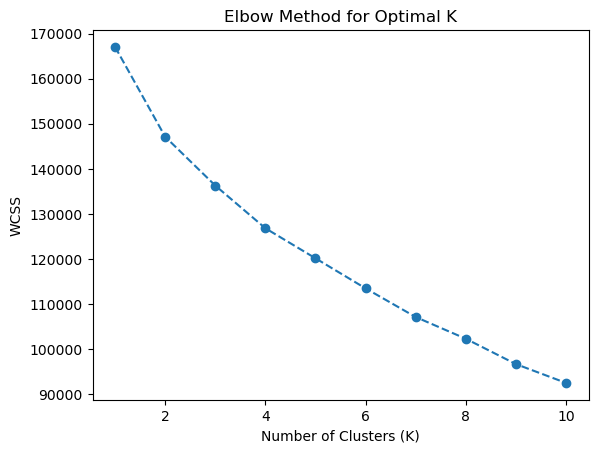

In [275]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [276]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [277]:
# df_scaled.head(10)

In [278]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,11933.0,3.096306e-17,1.666193,-4.298728,-0.890999,-0.267162,0.742171,12.029671
col2,11933.0,-2.352002e-17,1.304820,-7.854360,-0.858384,-0.119602,0.865793,4.312035
col3,11933.0,1.190887e-18,1.208705,-18.017799,-0.558156,0.106374,0.600450,6.594653


In [279]:

explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)


Explained variance of PC1 0.19828326032129054
Explained variance of PC2 0.12160096699234776
Explained variance of PC3 0.10434608937233196


In [280]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.columns)
loading_matrix

,PC1,PC2,PC3
Education,-0.209516,0.610606,-0.239877
FamilyIncomeRatio,-0.013092,0.735908,-0.274930
Housing,-0.068774,0.588490,-0.301210
BMI,0.787373,0.064099,-0.164403
WaistCircumference,0.808086,0.099138,-0.129672
SystolicBP,0.541102,0.186914,0.563393
DiastolicBP,0.594332,0.255823,0.570667
TotalCholesterol,0.225691,0.297731,0.302544
FastingBloodGlucose,0.442472,-0.260943,-0.374369
InsulinLevel,0.281328,-0.135706,-0.397262


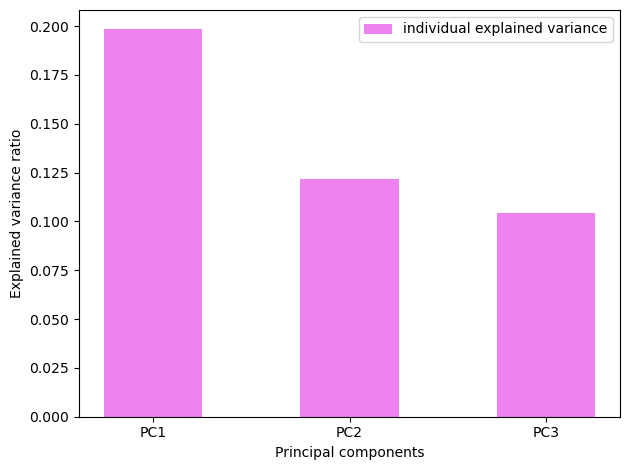

In [281]:
# plt.figure()
# principalcomponents = ['PC1', 'PC2']

# plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.tight_layout()

# plt.show()

plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

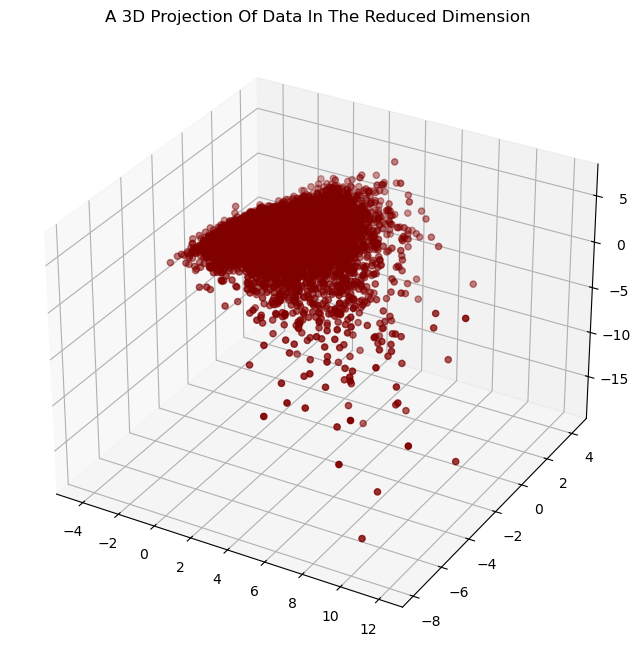

In [282]:
# # A 2D Projection Of Data In The Reduced Dimension
# x = PCA_ds["col1"]
# y = PCA_ds["col2"]

# # To plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111)
# ax.scatter(x, y, c="maroon", marker="o")
# ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
# plt.show()

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [283]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            11933 non-null  float64
 1   FamilyIncomeRatio    11933 non-null  float64
 2   Housing              11933 non-null  float64
 3   BMI                  11933 non-null  float64
 4   WaistCircumference   11933 non-null  float64
 5   SystolicBP           11933 non-null  float64
 6   DiastolicBP          11933 non-null  float64
 7   TotalCholesterol     11933 non-null  float64
 8   FastingBloodGlucose  11933 non-null  float64
 9   InsulinLevel         11933 non-null  float64
 10  CRP                  11933 non-null  float64
 11  Glycohemoglobin      11933 non-null  float64
 12  Ferritin             11933 non-null  float64
 13  RBCFolate            11933 non-null  float64
dtypes: float64(14)
memory usage: 1.3 MB


In [284]:
# # get the silhouette score
# from sklearn.metrics import silhouette_score

# silhouette_score(df_scaled, df_scaled['cluster'])


In [285]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
y_kmeans = kmeans.fit(PCA_ds)
PCA_ds["Clusters"] = y_kmeans.labels_
df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(PCA_ds, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 41351.773378752434
The average silhouette score is : 0.3997346256359529


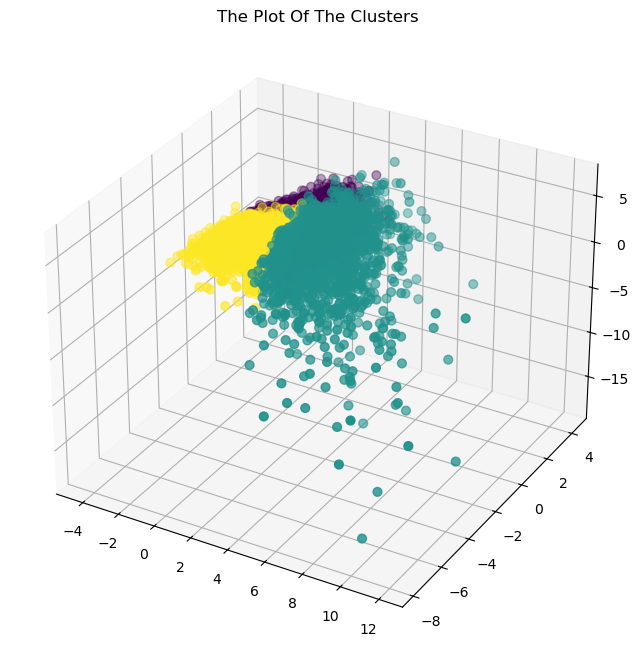

In [286]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


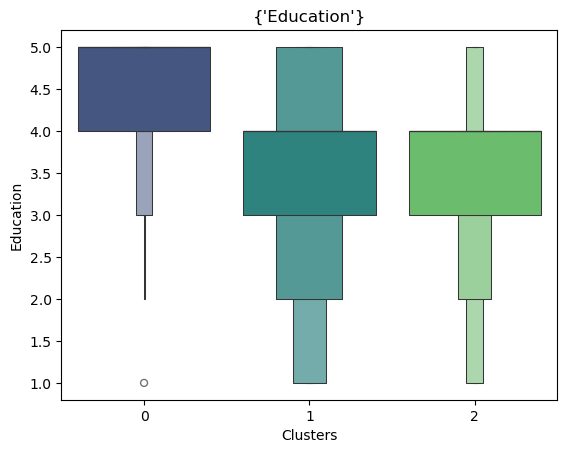

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


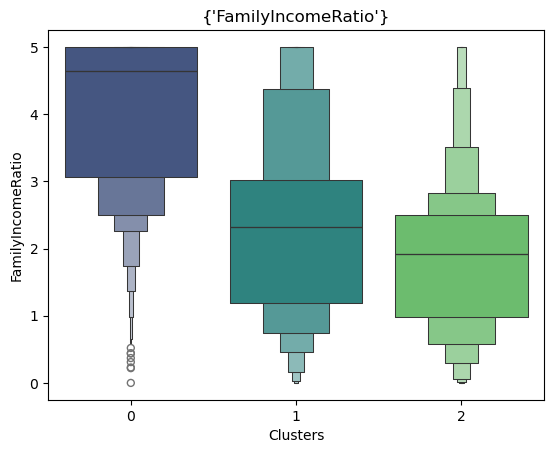

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


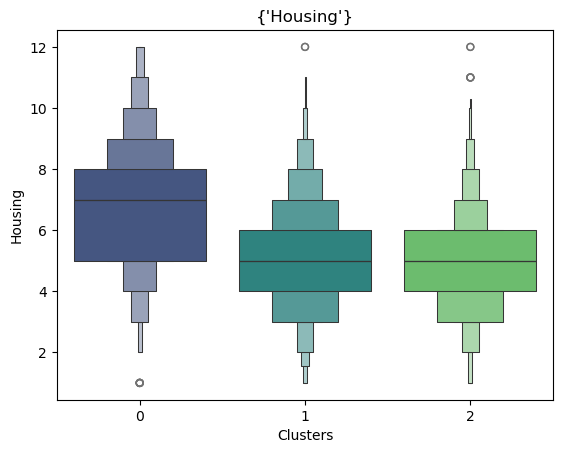

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


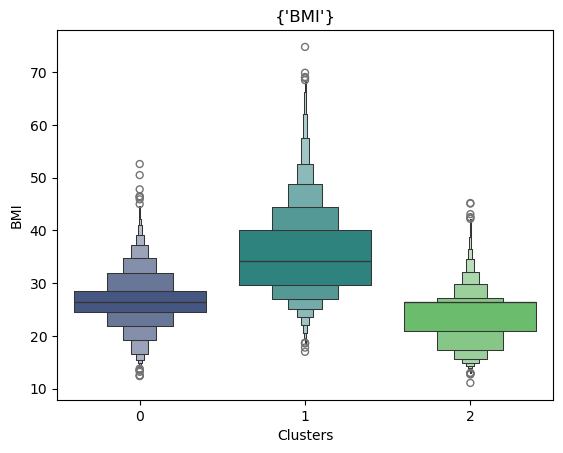

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


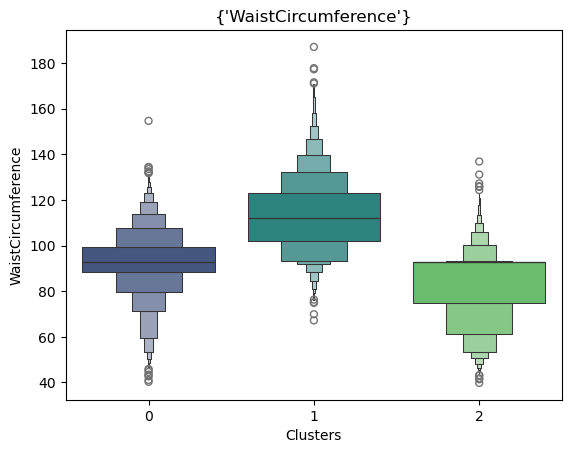

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


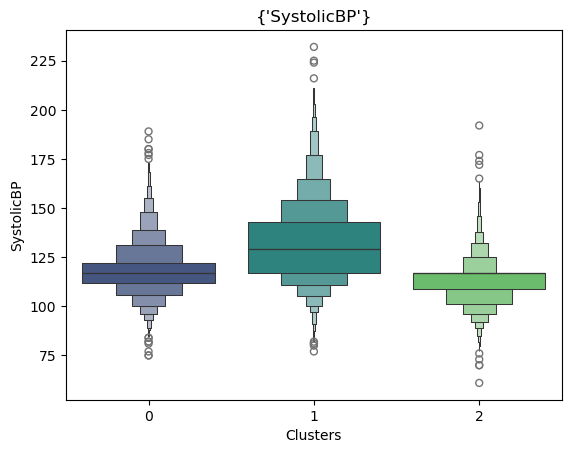

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


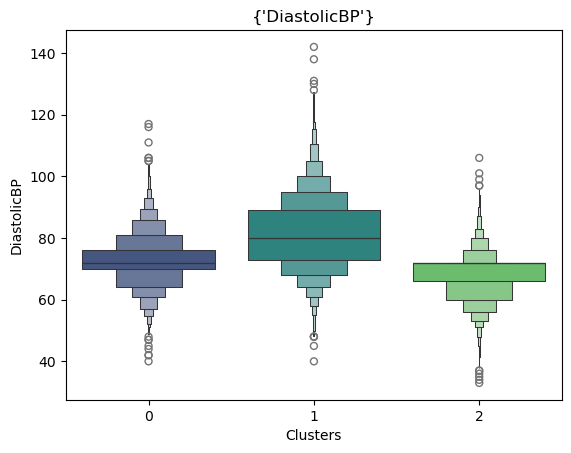

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


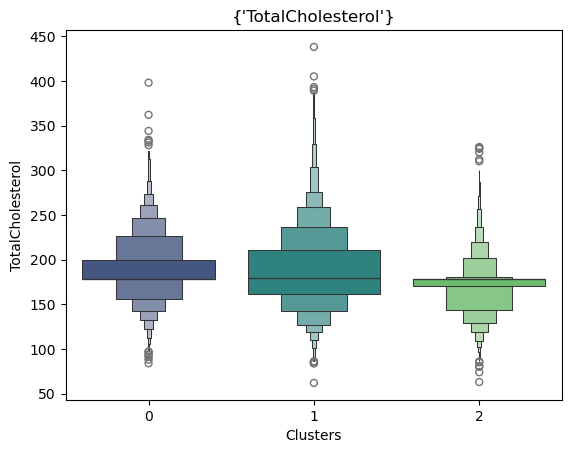

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


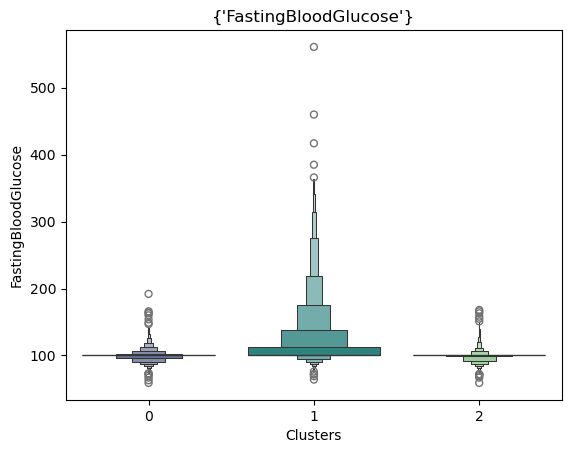

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


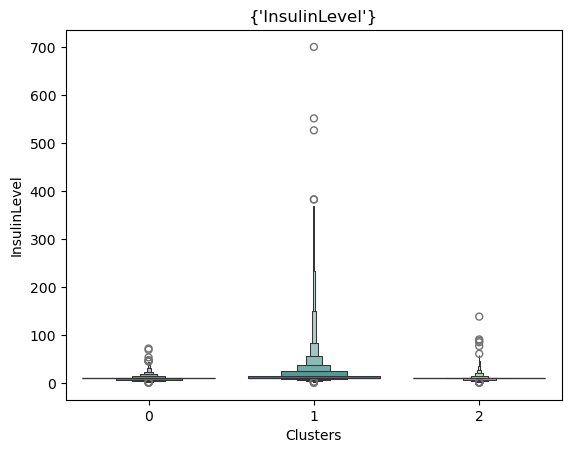

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


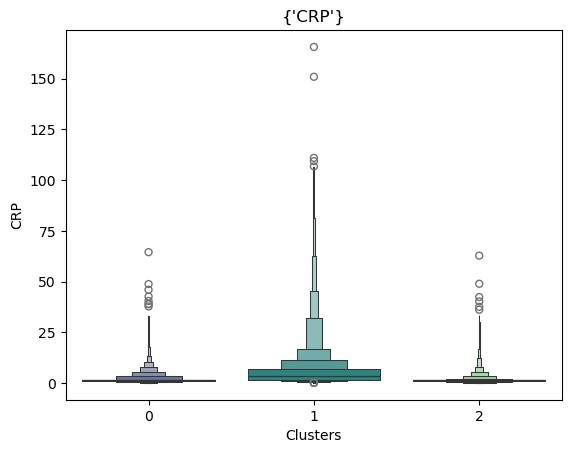

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


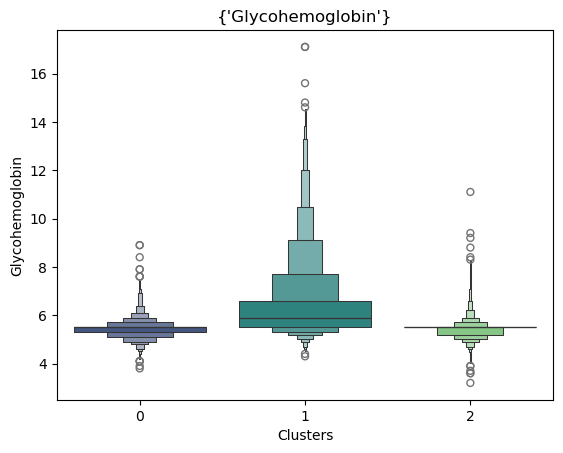

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


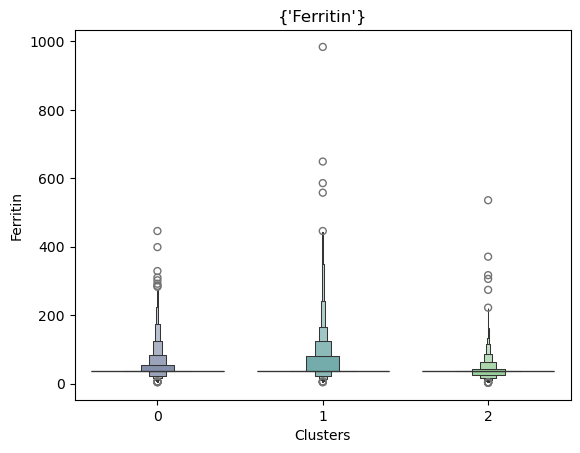

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


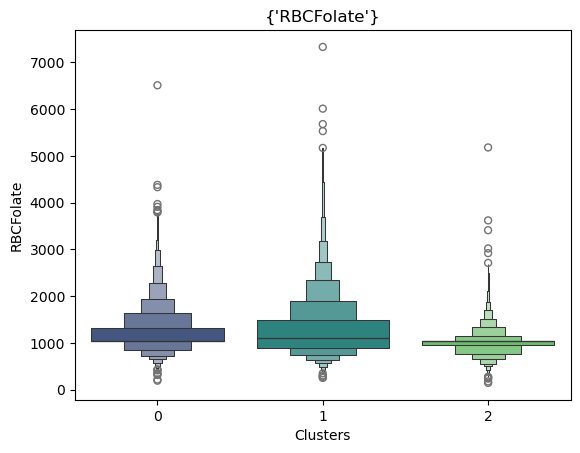

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


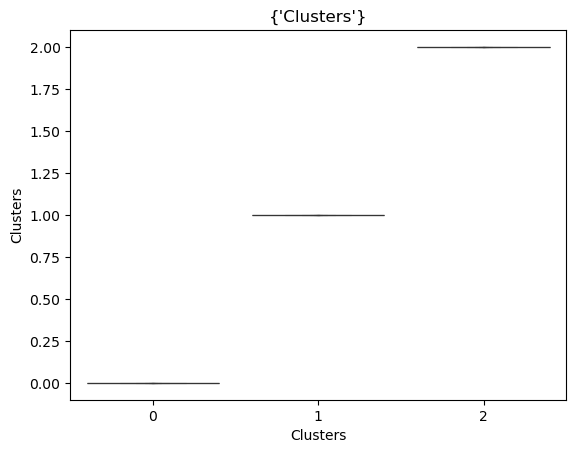

In [287]:
for col in df.columns:

  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

In [288]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled2 = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled2 = pd.DataFrame(df_scaled2, columns=df.columns)

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


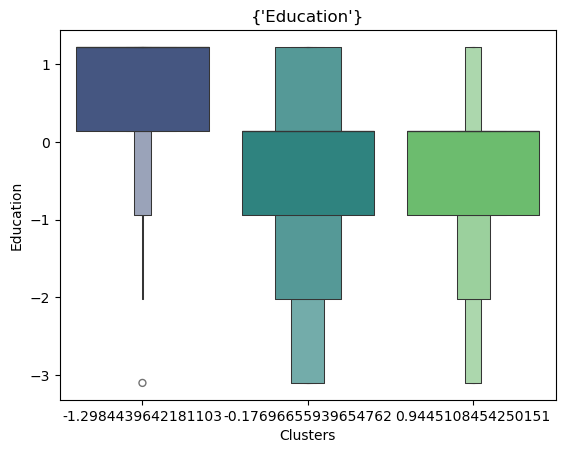

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


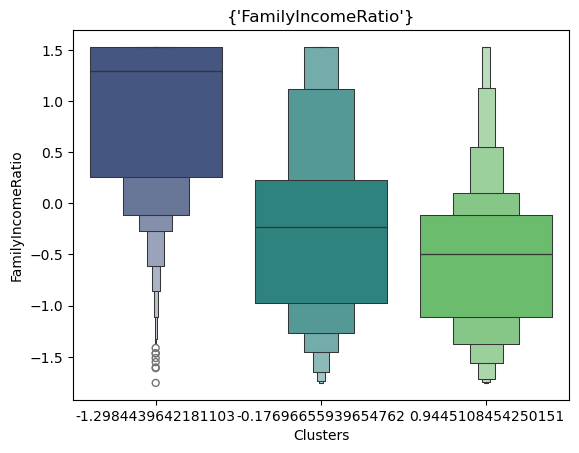

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


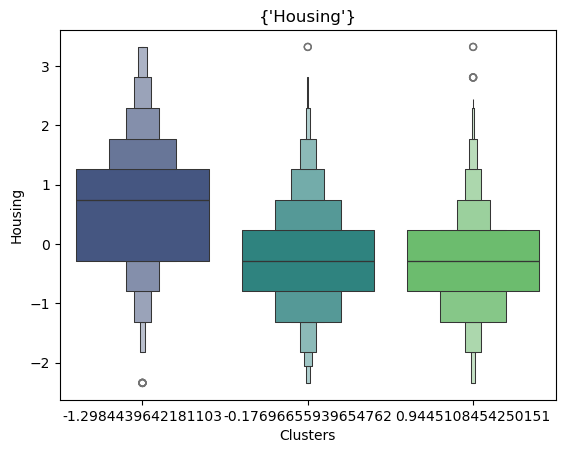

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


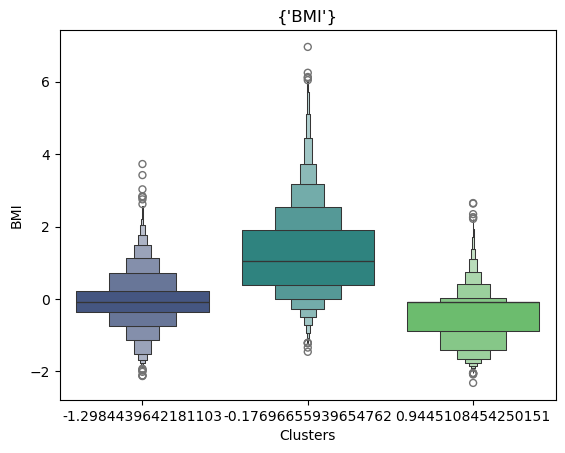

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


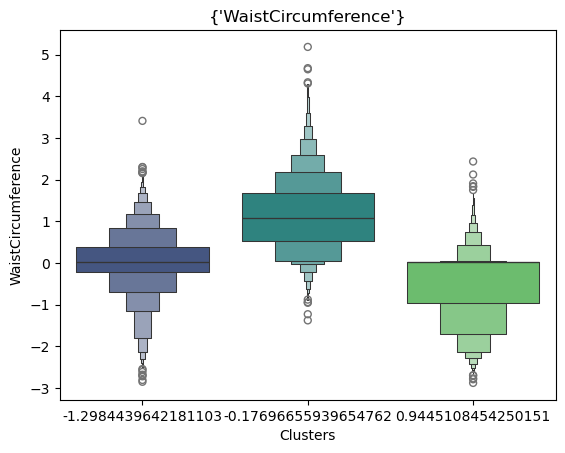

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


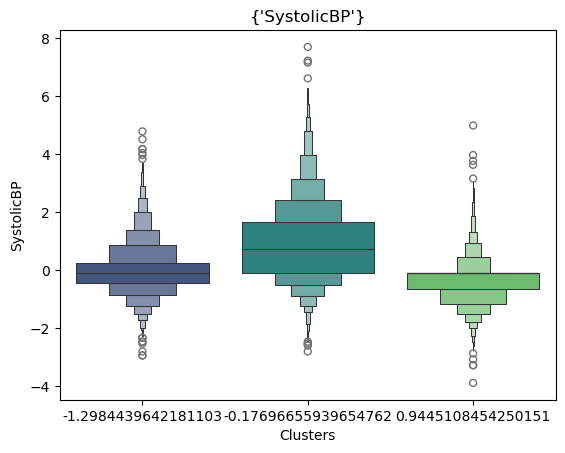

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


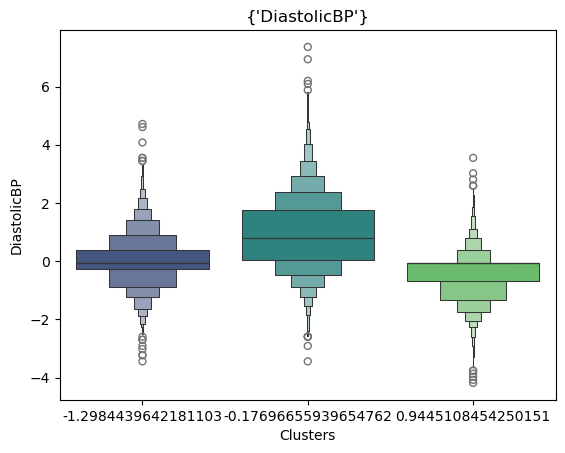

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


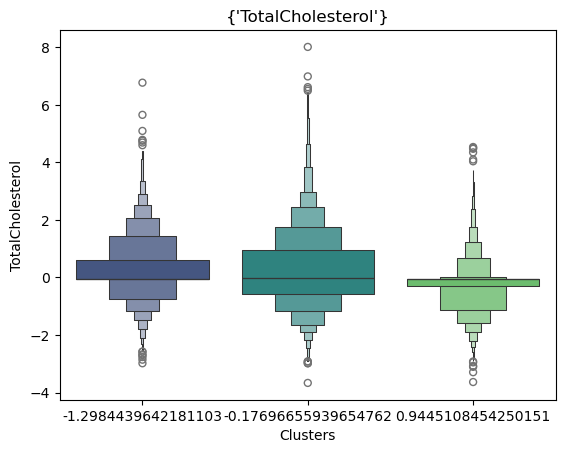

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


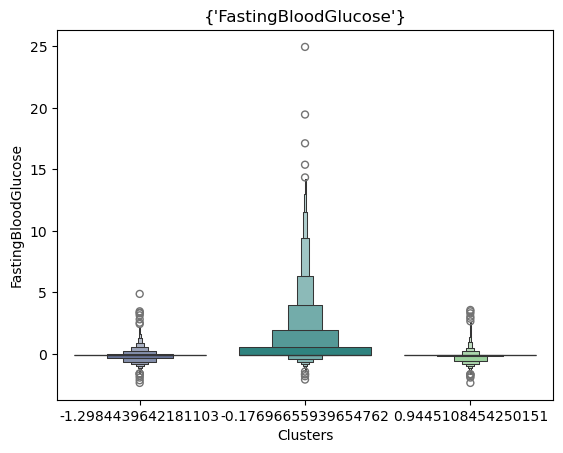

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


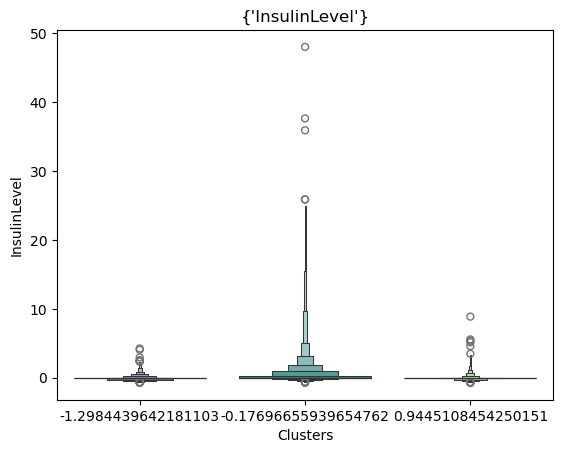

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


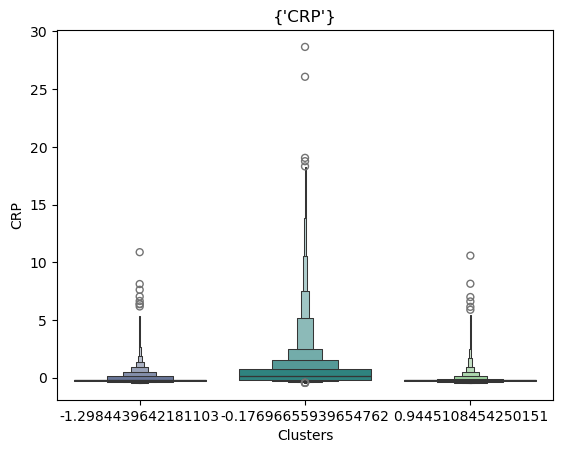

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


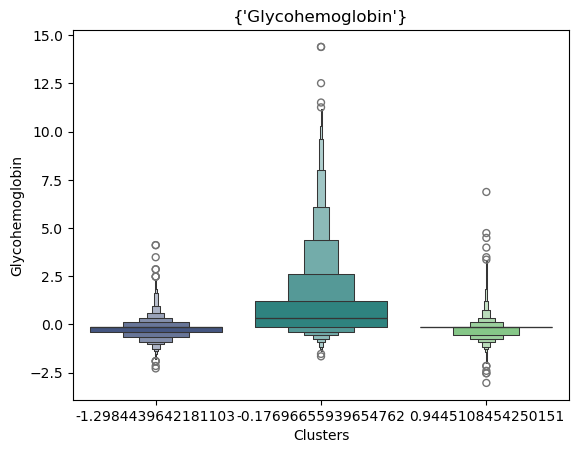

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


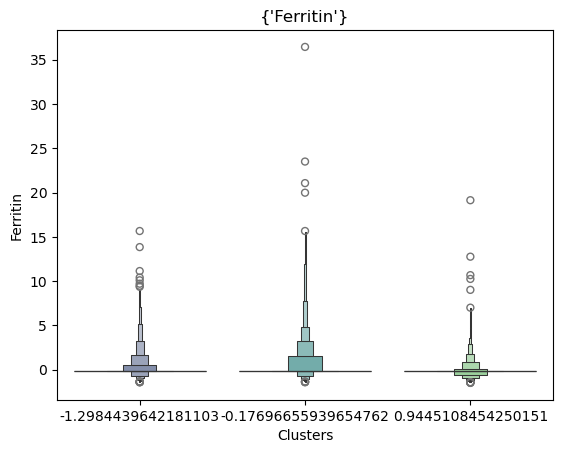

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


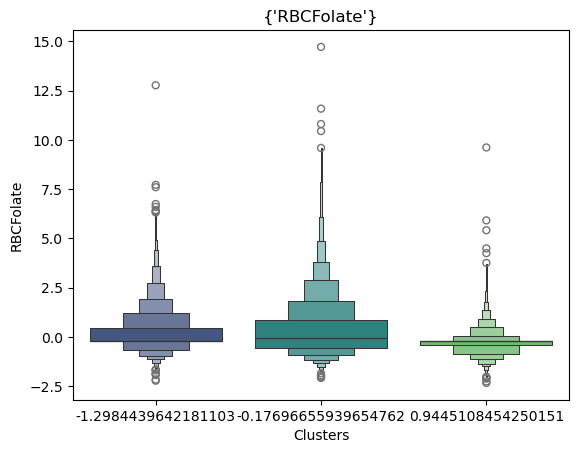

C:\Users\carla\AppData\Local\Temp\ipykernel_14308\1577087632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")


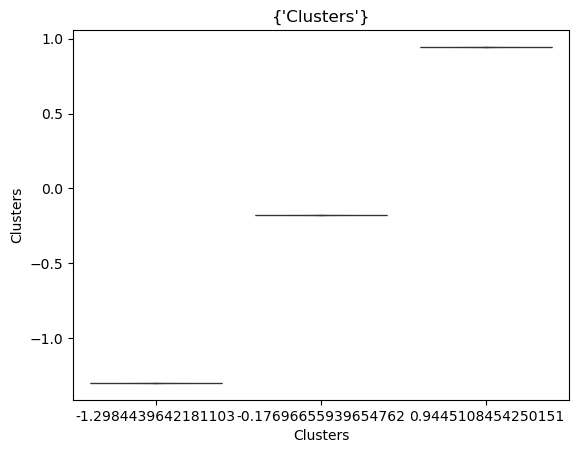

In [289]:
for col in df_scaled2.columns:

  plt.figure()
  pl=sns.boxenplot(y=df_scaled2[col],x=df_scaled2["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

### DB Scan

In [290]:
dbscan_df = df.copy()
dbscan_df.head()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(dbscan_df)

X_dbscan_face, X_test = train_test_split(dbscan_df, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_dbscan_face)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=dbscan_df.columns)

X_dbscan_face['cluster'] = kmeans.labels_

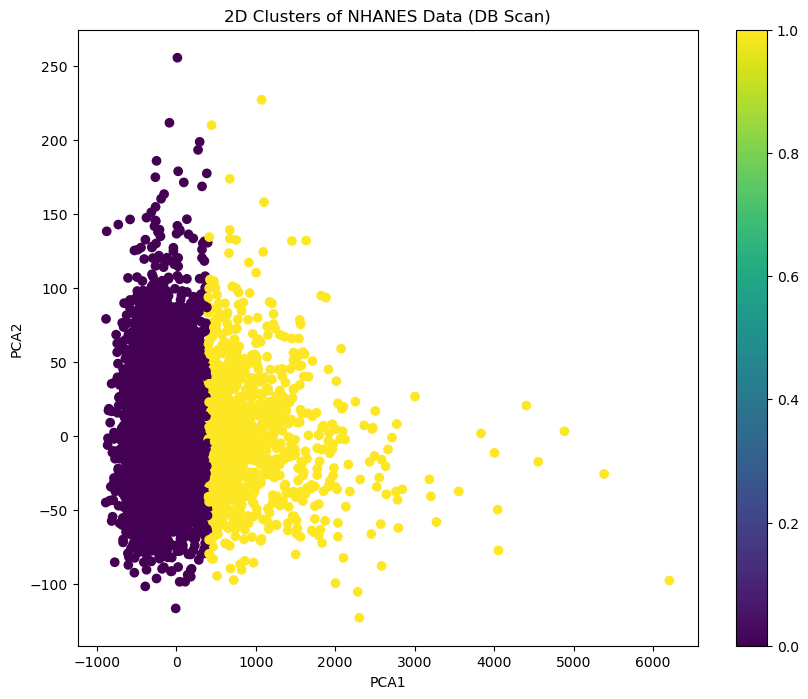

In [291]:
# use PCA in db scan

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_dbscan_face.drop(columns=['cluster']))

X_dbscan_face['PCA1'] = pca_result[:, 0]
X_dbscan_face['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_dbscan_face['PCA1'], X_dbscan_face['PCA2'], c=X_dbscan_face['cluster'], cmap='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D Clusters of NHANES Data (DB Scan)")
plt.colorbar()
plt.show()


In [292]:
silhouette_score(X_dbscan_face, X_dbscan_face['cluster'])

0.7347488312053737

In [293]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Total variance captured by selected components
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.98418007 0.00563532]
Total Variance Explained: 0.9898153866590795


In [294]:
# Show how much each feature contributes to each PCA component
loadings = pd.DataFrame(
    pca.components_, 
    columns=df.columns, 
    index=[f'PCA{i+1}' for i in range(pca.n_components_)]
)
print(loadings.T)  # Transpose to make it easier to read


                         PCA1      PCA2
Education            0.000058  0.000972
FamilyIncomeRatio    0.000329  0.004029
Housing              0.000309  0.001045
BMI                  0.002097  0.034219
WaistCircumference   0.006914  0.111193
SystolicBP           0.004440  0.093776
DiastolicBP          0.000912  0.090721
TotalCholesterol     0.002770  0.981982
FastingBloodGlucose  0.003265  0.027693
InsulinLevel         0.000468 -0.016382
CRP                  0.001073  0.006479
Glycohemoglobin      0.000153  0.001712
Ferritin             0.001190  0.063239
RBCFolate            0.999953 -0.004229
Clusters            -0.000401 -0.006106
